# Estimate a process event probability

The objective of this example is to evaluate the probability of an
event based on a stochastic process, using the Monte Carlo estimator.

Let $X: \Omega \times \mathcal{D} \rightarrow \mathbb{R}^d$ be a stochastic process
of dimension $d$, where $\mathcal{D} \in \mathbb{R}^n$ is discretized on the mesh
$\mathcal{M}$.

We define the event $\mathcal{E}$ as:

$$\begin{aligned} \displaystyle \mathcal{E}(X) = \bigcup_{\underline{t}\in \mathcal{M}}\left\{X_{\underline{t}}  \in \mathcal{A}  \right\}\end{aligned}$$

where $\mathcal{A}$ is a domain of $\mathbb{R}^d$.

We estimate the probabilty $p=\mathbb{P}\left(\mathcal{E}(X)\right)$ with the Monte Carlo
estimator.

The Monte Carlo algorithm is manipulated the same way as in the case
where the event is based on a random variable independent of time.

We illustrate the algorithm on the example of the bidimensionnal white
noise process $\varepsilon: \Omega \times \mathcal{D} \rightarrow \mathbb{R}^2$ where
$\mathcal{D}\in \mathbb{R}$, distributed according to the bidimensionnal standard
normal distribution (with zero mean, unit variance and independent
marginals).

We consider the domain $\mathcal{A} =  [1,2] \times [1,2]$. Then the event $\mathcal{E}$ writes:

$$\begin{aligned} \displaystyle \mathcal{E}(\varepsilon) = \bigcup_{\underline{t}\in \mathcal{M}}\left\{\varepsilon_{t}  \in \mathcal{A}  \right\}\end{aligned}$$

For all time stamps $t \in \mathcal{M}$, the probability $p_1$ that the process
enters into the domain $\mathcal{A}$ at time $t$ writes, using the independence
property of the marginals:

$$\begin{aligned} p_1 = \mathbb{P}\left(\varepsilon_t  \in \mathcal{A}\right) = (\Phi(2) - \Phi(1))^2\end{aligned}$$

with $\Phi$ the cumulative distribution function of the scalar standard *Normal* distribution.

As the proces is discretized on a time grid of size $N$ and using the
independance property of the white noise between two different time
stamps and the fact that the white noise follows the same distribution
at each time $t$, the final probability $p$ writes:

$$p = \mathbb{P}\left(\mathcal{E}(\varepsilon)\right) = 1 - (1 - p_1)^{N}$$

With $K=10^4$ realizations, using the Monte Carlo estimator, we obtain $p_K = 0.1627$,
to be compared to the exact value $p=0.17008$ for a time grid of size $N=10$.

In [11]:
from __future__ import print_function
import openturns as ot

In [12]:
# Create a time grid
tMin = 0.0
timeStep = 0.1
n = 100
tgrid = ot.RegularGrid(tMin, timeStep, n)

In [13]:
# Create a normal process
amplitude = [5.0]
scale = [3.0]
model = ot.ExponentialModel(scale, amplitude)
process = ot.GaussianProcess(model, tgrid)

In [14]:
# Create the 1-d domain A: [2.,5.]
lowerBound = [2.0]
upperBound = [5.0]
domain = ot.Interval(lowerBound, upperBound)

In [15]:
# Create an event from a Process and a Domain
event = ot.Event(process, domain)

In [18]:
# Create the Monte-Carlo algorithm
montecarlo = ot.ProbabilitySimulationAlgorithm(event)

# Define the maximum number of simulations
montecarlo.setMaximumOuterSampling(1000)

# Define the block size
montecarlo.setBlockSize(100)

# Define the maximum coefficient of variation
montecarlo.setMaximumCoefficientOfVariation(0.0025)

# Run the algorithm
montecarlo.run()

# Get the result
montecarlo.getResult()

probabilityEstimate=9.306612e-01 varianceEstimate=5.386451e-06 standard deviation=2.32e-03 coefficient of variation=2.49e-03 confidenceLength(0.95)=9.10e-03 outerSampling=121 blockSize=100

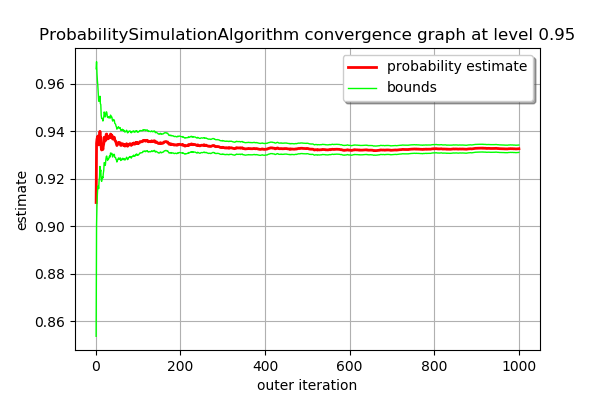

In [17]:
montecarlo.drawProbabilityConvergence(0.95)